# HighRadius ML Project


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv("dataset_for_ML_Model.csv")
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


In [3]:
df.tail()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200417,20200421,20200506.0,USD,RV,1.0,NaN,3187.86,20200421.0,NAA8,1.930797e+09,1
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,1.0,NaN,6766.54,20190815.0,NAH4,1.929744e+09,0
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,NaN,6120.86,20200219.0,NAA8,1.930537e+09,0
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,1.0,NaN,63.48,20191127.0,NAA8,1.930199e+09,0
49999,U001,0200020431,DEC corp,2019-01-15 00:00:00,2019.0,1.928576e+09,2019-01-05,20190105,20190105,20190124.0,USD,RV,1.0,NaN,1790.30,20190101.0,NAM4,1.928576e+09,0


In [4]:
df.shape

(50000, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Dividing the dataset into train and test dataset

In [6]:
train = df[df['clear_date'].notnull()]
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0
5,CA02,0140106181,THE corporation,2019-12-04 00:00:00,2019.0,2.960581e+09,2019-09-20,20190920,20190920,20191004.0,CAD,RV,1.0,NaN,22225.84,20190924.0,CA10,2.960581e+09,0


In [7]:
train.shape

(40000, 19)

In [8]:
test = df[df['clear_date'].isnull()]
test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
7,U001,0200744019,TARG us,NaN,2020.0,1.930659e+09,2020-03-19,20200318,20200319,20200403.0,USD,RV,1.0,NaN,11173.02,20200319.0,NAA8,1.930659e+09,1
10,U001,0200418007,AM,NaN,2020.0,1.930611e+09,2020-03-11,20200306,20200311,20200326.0,USD,RV,1.0,NaN,3525.59,20200311.0,NAA8,1.930611e+09,1
14,U001,0200739534,OK systems,NaN,2020.0,1.930788e+09,2020-04-15,20200415,20200415,20200430.0,USD,RV,1.0,NaN,121105.65,20200415.0,NAA8,1.930788e+09,1
15,U001,0200353024,DECA corporation,NaN,2020.0,1.930817e+09,2020-04-23,20200423,20200423,20200426.0,USD,RV,1.0,NaN,3726.06,20200416.0,NAM2,1.930817e+09,1


In [9]:
test.shape

(10000, 19)

### Data preprocessing on train dataset

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           40000 non-null  object 
 1   cust_number             40000 non-null  object 
 2   name_customer           40000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           40000 non-null  float64
 5   doc_id                  40000 non-null  float64
 6   posting_date            40000 non-null  object 
 7   document_create_date    40000 non-null  int64  
 8   document_create_date.1  40000 non-null  int64  
 9   due_in_date             40000 non-null  float64
 10  invoice_currency        40000 non-null  object 
 11  document type           40000 non-null  object 
 12  posting_id              40000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       40000 non-null

In [11]:
train.nunique()

business_code                 6
cust_number                1344
name_customer              3889
clear_date                  403
buisness_year                 2
doc_id                    39158
posting_date                424
document_create_date        427
document_create_date.1      424
due_in_date                 491
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         35664
baseline_create_date        431
cust_payment_terms           70
invoice_id                39152
isOpen                        1
dtype: int64

In [12]:
#columns posting_id ans isOpen consists of only 1 constant value so, we will drop those columns
train.drop(['posting_id', 'isOpen'], axis=1, inplace=True)

In [13]:
train.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
dtype: int64

In [14]:
#As area_business contains all null values we will remove that column
train.drop('area_business', axis=1, inplace=True)

In [15]:
train.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                6
dtype: int64

#### Now checking for Quasi constant features if we get any we will remove that columns 

In [16]:
threshold = 0.999
quasi_cols = []
rows = train.shape[0]
for e in train.columns:
    top_val = (train[e].value_counts()/rows).sort_values(ascending = False).values[0]
    if top_val >= threshold:
        quasi_cols.append(e)
train.drop(quasi_cols, axis=1, inplace=True)
train.shape

(40000, 15)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           40000 non-null  object 
 1   cust_number             40000 non-null  object 
 2   name_customer           40000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           40000 non-null  float64
 5   doc_id                  40000 non-null  float64
 6   posting_date            40000 non-null  object 
 7   document_create_date    40000 non-null  int64  
 8   document_create_date.1  40000 non-null  int64  
 9   due_in_date             40000 non-null  float64
 10  invoice_currency        40000 non-null  object 
 11  total_open_amount       40000 non-null  float64
 12  baseline_create_date    40000 non-null  float64
 13  cust_payment_terms      40000 non-null  object 
 14  invoice_id              39994 non-null

In [18]:
#Don't do this part
# As invoice_id contains only 6 null values lets remove them
#train.dropna(subset=['invoice_id'], axis=0, inplace=True)

In [19]:
train.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                6
dtype: int64

#### Now there is no missing values in the dataset

In [20]:
#checking if any duplicate elements present in both the columns
(train["document_create_date"] == train["document_create_date.1"]).value_counts()

False    22918
True     17082
dtype: int64

In [21]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,54273.28,20200126.0,NAH4,1.930438e+09
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,79656.60,20190722.0,NAD1,1.929646e+09
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,2253.86,20190914.0,NAA8,1.929874e+09
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,33133.29,20191113.0,NAH4,1.930148e+09
5,CA02,0140106181,THE corporation,2019-12-04 00:00:00,2019.0,2.960581e+09,2019-09-20,20190920,20190920,20191004.0,CAD,22225.84,20190924.0,CA10,2.960581e+09


### Date Time Conversion

In [22]:
train.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'total_open_amount', 'baseline_create_date', 'cust_payment_terms',
       'invoice_id'],
      dtype='object')

In [23]:
train['clear_date'] = pd.to_datetime(df['clear_date'], format='%Y-%m-%d %H:%M:%S')
train['posting_date'] = pd.to_datetime(df['posting_date'])
train['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
train['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d')
train['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')
train['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')

In [24]:
train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
dtype: object

<AxesSubplot:xlabel='invoice_currency', ylabel='count'>

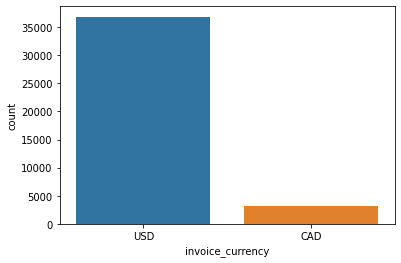

In [25]:
# Checking the invoice_currency column
sns.countplot(train['invoice_currency'])

#### Checking for duplicated columns

In [26]:
#As seen from the train.nuinque if the posting_date and document_create_date.1 columns consists of equal no,
# of unique values lets check if these columns are duplicates for each other if yes we will remove any one of the col

if df["posting_date"].all() == df["document_create_date.1"].all():
    print("Both are duplicate columns")
else:
    print("Not duplicate columns")

Both are duplicate columns



## EDA

### Univariate analysis


In [27]:
train.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'total_open_amount', 'baseline_create_date', 'cust_payment_terms',
       'invoice_id'],
      dtype='object')

In [28]:
train.business_code.value_counts()

U001    36190
CA02     3180
U013      501
U002      116
U005        9
U007        4
Name: business_code, dtype: int64

<AxesSubplot:xlabel='business_code', ylabel='count'>

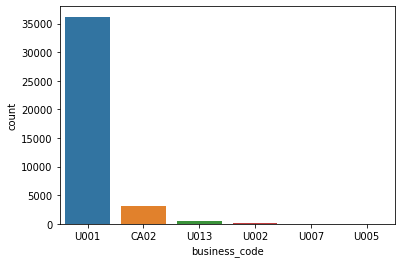

In [29]:
sns.countplot(train['business_code'])

In [30]:
train.buisness_year.value_counts()

2019.0    34715
2020.0     5285
Name: buisness_year, dtype: int64

<AxesSubplot:xlabel='buisness_year', ylabel='count'>

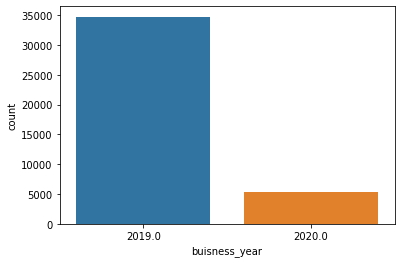

In [31]:
sns.countplot(train['buisness_year'])

In [32]:
train['total_open_amount'].value_counts()

1897.50     103
471.56       78
1898.20      71
1328.25      59
943.12       56
           ... 
416.20        1
49840.78      1
25824.23      1
312.56        1
1790.30       1
Name: total_open_amount, Length: 35664, dtype: int64

<AxesSubplot:xlabel='clear_date', ylabel='Density'>

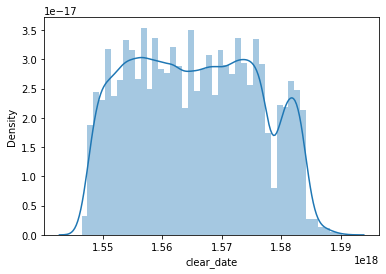

In [33]:
sns.distplot(train['clear_date'])

In [40]:
train['clear_date'].head()

0   2020-02-11
1   2019-08-08
2   2019-12-30
4   2019-11-25
5   2019-12-04
Name: clear_date, dtype: datetime64[ns]

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

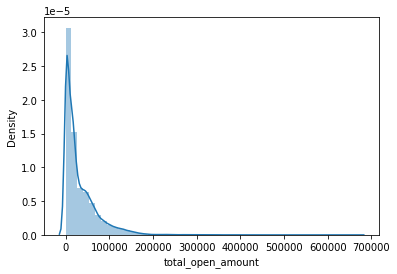

In [34]:
sns.distplot(train['total_open_amount'])

<AxesSubplot:xlabel='posting_date', ylabel='Density'>

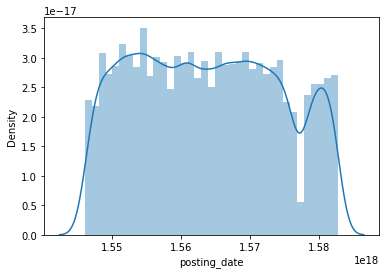

In [35]:
sns.distplot(train['posting_date'])

<AxesSubplot:xlabel='document_create_date', ylabel='Density'>

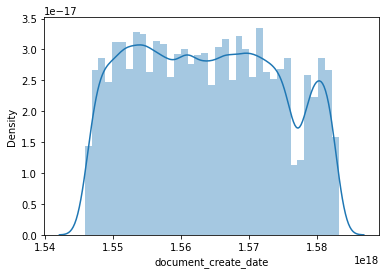

In [36]:
sns.distplot(train['document_create_date'])

<AxesSubplot:xlabel='doc_id', ylabel='Density'>

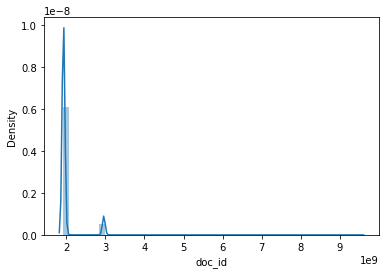

In [37]:
sns.distplot(train['doc_id'])